# Домашнее задание 4 - Непараметрические критерии


In [1]:
from scipy.stats import norm, binom, probplot, kstest, shapiro, ks_2samp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Задача 1 (5 баллов)




1.   Сгенерить самостоятельно 2 распределения, нормальное с любыми параметрами и размером 1000 и биномиальное с параметрами 1, 0.5 и размером 100





















In [2]:
norm_dist = norm(loc=10, scale=5).rvs(1000)
binom_dist = binom(n=1, p=0.5).rvs(100)

2.   Для каждого распределения  
    *   Построить Q-Q plot  
    *   Проверить нормальность с помощью критерия согласия Колмогорова  
    *   Проверить нормальность с помощью критерия Шапиро-Уилка  
    *   Проверить то что ваши распределения имееют общее распределение с помощью критерия однородности Смирнова


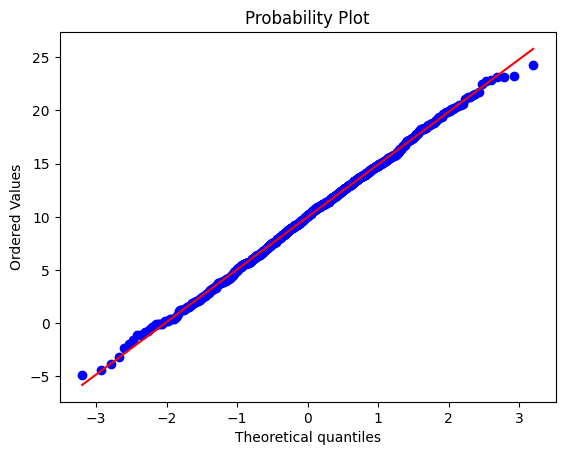

In [3]:
probplot(norm_dist, dist="norm", plot=plt)

plt.show()

In [4]:
norm_kstest = kstest(norm_dist, "norm", args=(np.mean(norm_dist), np.std(norm_dist)))

print(norm_kstest)

print(
    "Распределение соответствует нормальному распределению т.к. статистика Колмогорова стремится к 0"
)

KstestResult(statistic=np.float64(0.017034842562859143), pvalue=np.float64(0.9288679004066905), statistic_location=np.float64(10.763270101449361), statistic_sign=np.int8(-1))
Распределение соответствует нормальному распределению т.к. статистика Колмогорова стремится к 0


In [5]:
norm_shapiro = shapiro(norm_dist)

print(norm_shapiro)

print(
    "Распределение соответствует нормальному распределению т.к. статистика Шапиро-Уилка стремится к 1"
)

ShapiroResult(statistic=np.float64(0.9986687017782104), pvalue=np.float64(0.6674365494505514))
Распределение соответствует нормальному распределению т.к. статистика Шапиро-Уилка стремится к 1


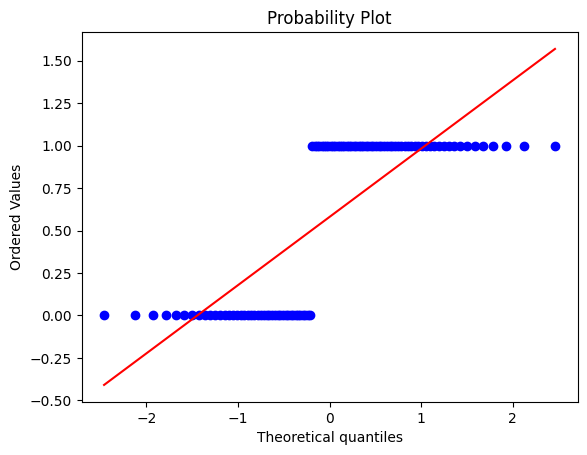

In [10]:
probplot(binom_dist, dist="norm", plot=plt)

plt.show()

In [11]:
binom_kstest = kstest(
    binom_dist, "norm", args=(np.mean(binom_dist), np.std(binom_dist))
)

print(binom_kstest)

print(
    "Биномиальное распределение не соответствует нормальному распределению т.к. статистика Колмогорова стремится к 0.5"
)


KstestResult(statistic=np.float64(0.3826050310265358), pvalue=np.float64(1.1257697283013928e-13), statistic_location=np.int64(1), statistic_sign=np.int8(-1))
Биномиальное распределение не соответствует нормальному распределению т.к. статистика Колмогорова стремится к 0.5


In [12]:
binom_shapiro = shapiro(binom_dist)

print(binom_shapiro)

print(
    "Биномиальное распределение не соответствует нормальному распределениют.к. статистика Шапиро-Уилка стремится к 0.5"
)

ShapiroResult(statistic=np.float64(0.6270248025177978), pvalue=np.float64(1.4456353444494354e-14))
Биномиальное распределение не соответствует нормальному распределениют.к. статистика Шапиро-Уилка стремится к 0.5


In [14]:
dist_ks_2samp = ks_2samp(norm_dist, binom_dist)

print(dist_ks_2samp)

print(
    "Биномиальное распределение не соответствует нормальному распределению т.к. статистика критерия однородности Смирнова стремится к 1"
)

KstestResult(statistic=np.float64(0.967), pvalue=np.float64(2.5800578633877477e-113), statistic_location=np.float64(1.0), statistic_sign=np.int8(-1))
Биномиальное распределение не соответствует нормальному распределению т.к. статистика критерия однородности Смирнова стремится к 1


3.   Собрать новую выборку из ваших 2 сгенирированных распределений. Для этого взять случайных 900 элементов из нормального распределения и добавить к ним выборку с биномиальным распределением, чтобы снова получили выборки из 1000 элементов

In [15]:
random_idx = np.random.choice(1000, 900, replace=False)
norm_sample = norm_dist[random_idx]

combined_dist = np.concatenate((norm_sample, binom_dist))

4.   Для новой "собранной выборки"  
    *   Построить Q-Q plot  
    *   Проверить нормальность с помощью критерия согласия Колмогорова  
    *   Проверить нормальность с помощью критерия Шапиро-Уилка

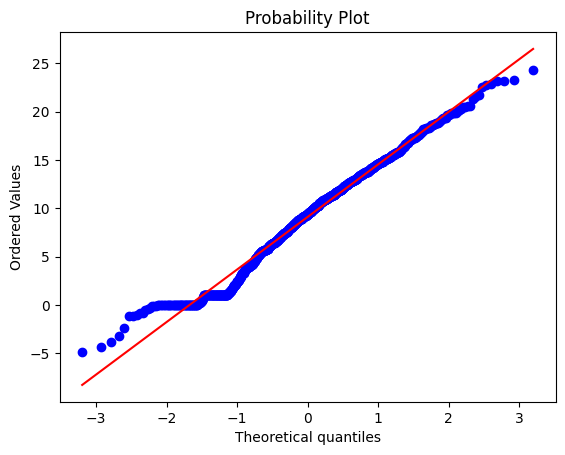

In [16]:
probplot(combined_dist, dist="norm", plot=plt)

plt.show()

In [18]:
combined_kstest = kstest(
    combined_dist, "norm", args=(np.mean(combined_dist), np.std(combined_dist))
)

print(combined_kstest)

print("Данные нельзя назвать нормальными т.к. р-значение Колмогорова стремится к 0")

KstestResult(statistic=np.float64(0.05954601355744213), pvalue=np.float64(0.0015931135353251344), statistic_location=np.float64(1.0), statistic_sign=np.int8(1))
Данные нельзя назвать нормальными т.к. р-значение Колмогорова стремится к 0


In [19]:
combined_shapiro = shapiro(combined_dist)

print(combined_shapiro)

print("Статистики говорят, что данные можно назвать нормальными")

ShapiroResult(statistic=np.float64(0.9840219668971095), pvalue=np.float64(5.2886209986400565e-09))
Статистики говорят, что данные можно назвать нормальными


5.  Из выборки с нормальным распределением получить новую выборку. Сделаем это с помощью "докидывания эффекта". Взять текущую выборку с нормальным распределением и рандомные 500 элементов увеличить на 5%, остальные оставим без изменений

In [20]:
random_idx = np.random.choice(1000, 500, replace=False)
norm_dist_5 = norm_dist.copy()

norm_dist_5[random_idx] = norm_dist_5[random_idx] * 1.05

6. Для новой выборки с "докинутым эффектом"
    *   Построить Q-Q plot
    *   Проверить нормальность с помощью критерия согласия Колмогорова
    *   Проверить нормальность с помощью критерия Шапиро-Уилка
    *   Проверить то что ваши распределения (изначальное нормальное из п1 и полученное в п5) имееют общее распределение с помощью критерия однородности Смирнова

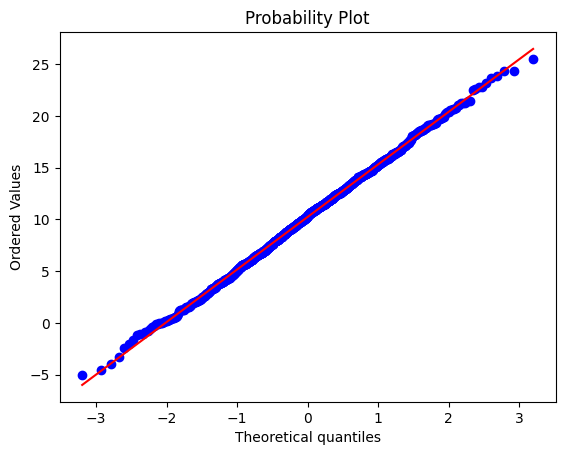

In [21]:
probplot(norm_dist_5, dist="norm", plot=plt)

plt.show()

In [22]:
norm_kstest_new = kstest(
    norm_dist_5, "norm", args=(np.mean(norm_dist_5), np.std(norm_dist_5))
)

print(norm_kstest_new)

print(
    "Распределение соответствует нормальному распределению т.к. статистика Колмогорова стремится к 0"
)

KstestResult(statistic=np.float64(0.016848156323371777), pvalue=np.float64(0.9344131712645389), statistic_location=np.float64(10.702786767870723), statistic_sign=np.int8(-1))
Распределение соответствует нормальному распределению т.к. статистика Колмогорова стремится к 0


In [24]:
norm_shapiro_new = shapiro(norm_dist_5)

print(norm_shapiro_new)

print(
    "Распределение соответствует нормальному распределению т.к. статистика Шапиро-Уилка стремится к 1"
)

ShapiroResult(statistic=np.float64(0.9989137266844695), pvalue=np.float64(0.8255058266584462))
Распределение соответствует нормальному распределению т.к. статистика Шапиро-Уилка стремится к 1


In [26]:
dist_new_ks_2samp = ks_2samp(norm_dist, norm_dist_5)

print(dist_new_ks_2samp)

print(
    "Биномиальное распределение не соответствует нормальному распределению т.к. р-значение критерия однородности Смирнова стремится к 1"
)

KstestResult(statistic=np.float64(0.032), pvalue=np.float64(0.6854967337920594), statistic_location=np.float64(13.974073969959086), statistic_sign=np.int8(1))
Биномиальное распределение не соответствует нормальному распределению т.к. р-значение критерия однородности Смирнова стремится к 1


## Задача 2 (4 балла)

Для данных из файла employees.xls постройте гистограмму для переменной SALARY. Проверьте нормальность этих данных с помощью:
  * Q-Q plot
  * Критерия Колмогорова
  * Критерия Шапиро-Уилка


In [27]:
!curl -O https://raw.githubusercontent.com/YuriyKotov/datasets/master/employees.xls >> employees.xls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 26624  100 26624    0     0  73684      0 --:--:-- --:--:-- --:--:-- 73750


In [28]:
df = pd.read_excel("employees.xls")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  100 non-null    object
 1   GENDER      100 non-null    object
 2   DEPART      100 non-null    object
 3   EDUC        100 non-null    object
 4   AGE         100 non-null    int64 
 5   HEIGHT      100 non-null    int64 
 6   SENIOR      100 non-null    int64 
 7   SALARY      100 non-null    int64 
 8   INI_PROF    100 non-null    int64 
 9   CUR_PROF    100 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 7.9+ KB


In [29]:
df.head()

,Unnamed: 0,GENDER,DEPART,EDUC,AGE,HEIGHT,SENIOR,SALARY,INI_PROF,CUR_PROF
0,Alexander,Female,Ship,College,22,63,4,23400,82,90
1,Arcones,Male,Package,College,49,65,17,40400,89,123
2,Barber,Male,Bake,College,36,67,8,29400,77,93
3,Barrera,Male,Package,HS,37,67,3,24800,102,108
4,Bester,Male,Ship,Grad,43,66,11,31200,82,104


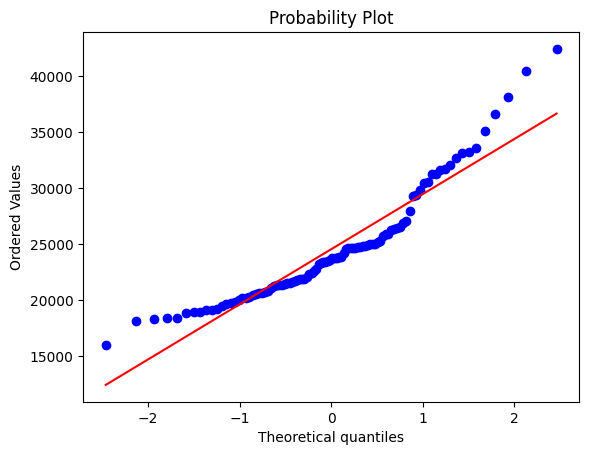

In [30]:
salary = df["SALARY"]

probplot(salary, dist="norm", plot=plt)

plt.show()

In [32]:
salary_kstest = kstest(salary, "norm", args=(np.mean(salary), np.std(salary)))

print(salary_kstest)

print("Данные нельзя назвать нормальными т.к. р-значение Колмогорова стремится к 0")

KstestResult(statistic=np.float64(0.152518581459004), pvalue=np.float64(0.016985059239319866), statistic_location=np.int64(25000), statistic_sign=np.int8(1))
Данные нельзя назвать нормальными т.к. р-значение Колмогорова стремится к 0


In [33]:
salary_shapiro = shapiro(salary)

print(salary_shapiro)

print(
    "Распределение соответствует нормальному распределению т.к. статистика Шапиро-Уилка стремится к 1"
)

ShapiroResult(statistic=np.float64(0.9015022004875934), pvalue=np.float64(1.664645028598051e-06))
Распределение соответствует нормальному распределению т.к. статистика Шапиро-Уилка стремится к 1


## Задача 3 (3 балла)

Для данных из файла employees.xls проверить с помощью критерия знаков и рангового критерия гипотезу что медианная зарплата равна 25000

## Задача 4 (3 балла)

В файле anorexia.txt записан вес пациентов до и после начала терапии от анорексии. С помощью критерия знаков и рангового критерия проверить, была ли эффективна данная терапия

In [5]:
!curl -O https://raw.githubusercontent.com/YuriyKotov/datasets/master/anorexia.txt >> anorexia.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   355  100   355    0     0   1132      0 --:--:-- --:--:-- --:--:--  1134


In [ ]:
df = pd.read_csv("anorexia.txt", sep="\t")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Before  29 non-null     float64
 1   After   29 non-null     float64
dtypes: float64(2)
memory usage: 596.0 bytes


In [7]:
df.head()

,Before,After
0,80.5,82.2
1,84.9,85.6
2,81.5,81.4
3,82.6,81.9
4,79.9,76.4


## Задача 5 (3 балла)

В файле seattle.txt записаны цены на объекты недвижимости в одном районе из районов Сиетла в 2001 и 2002 году (объекты выбирались случайно). Изменились ли средние цены в этом районе за год? Проверить это с помощью критерия знаков и рангового критерия

In [8]:
!curl -O https://raw.githubusercontent.com/YuriyKotov/datasets/master/seattle.txt >> seattle.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

100   996  100   996    0     0   3263      0 --:--:-- --:--:-- --:--:--  3265


In [ ]:
df = pd.read_csv("seattle.txt", sep="\t")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   100 non-null    float64
 1   Year    100 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [10]:
df.head()

,Price,Year
0,142.0,2002
1,232.0,2002
2,132.5,2002
3,200.0,2002
4,362.0,2002


## Задача 6 (3 балла)

В рамках исследования эффективности лекарства
пациенты с синдромом дефицита внимания и гиперактивностью в течение недели принимали либо лекарство, либо плацебо. В конце недели каждый пациент проходил тест на способность к подавлению импульсивных поведенческих реакций. Был ли эффект от применения лекарства? Данные находятся в файле methylphenidate.txt.

In [11]:
!curl -O https://raw.githubusercontent.com/YuriyKotov/datasets/master/methylphenidate.txt >> methylphenidate.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   168  100   168    0     0    621      0 --:--:-- --:--:-- --:--:--   622


In [ ]:
df = pd.read_csv("methylphenidate.txt", sep=" ")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Placebo          24 non-null     int64
 1   Methylphenidate  24 non-null     int64
dtypes: int64(2)
memory usage: 516.0 bytes


In [13]:
df.head()

,Placebo,Methylphenidate
0,57,62
1,27,49
2,32,30
3,31,34
4,34,38


## Задача 7 (2 балла)


1.   Сгенерировать выборки с нормальным распределением без выбросов, докинуть эффект на одну из них равномерно и с помощью распределения
2.   То же, что и в п1, но выборки с выбросами сделать
3.   Для случаев из п1 и п2 бутстрэпом оценить: среднее, медиану, 25% перцентиль, построить доверительные интервалы для статистик (речь о разницах средних/медиан/перцентилей для групп)
4.   Для случаев из п1 и п2 оценить среднее т-тестом и Манном-Уитни. Сравнить с результатами бутстрэпа. Сделать выводы. Сравниваем точечные оценки (на бутстрэпе их тоже считаем)

Примечание:
- Бутстреп считать минимум на 1000 итераций
- Для докидывания эффекта с помощью распределения возьмите распределение из stats, параметры задаются исходя из параметров изначального вектора и желаемого эффекта


## Задача 8 (2 балла)

Сгенерировать 2 выборки из нормального распределения с 1000 элементов каждая.
- Оцените на этих данных мощность и корректность t-test и Манна-Уитни
- Докиньте выбросы в обе группы и проверьте как изменится мощность и корректность

Для оценки использовать минимум 1000 итераций